# Temperature Forecast Project using ML

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.
 
Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
#Loading the dataset
df = pd.read_csv("temperature.csv")
print("Successfully Imported Data!")
df

Successfully Imported Data!


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [102]:
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [103]:
df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [104]:
df.columns 

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Starting EDA

In [105]:
print('No of rows in the data set:- ',df.shape[0])
print('No of columns in the data set:- ',df.shape[1])

No of rows in the data set:-  7752
No of columns in the data set:-  25


- This dataset contains 7752 rows and 25 Columns.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- This dataset contains all columns with integer values except Date contains object values.

In [107]:
# Checking for null values if any
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- This dataset contains null values,we have to treat them.

<AxesSubplot:>

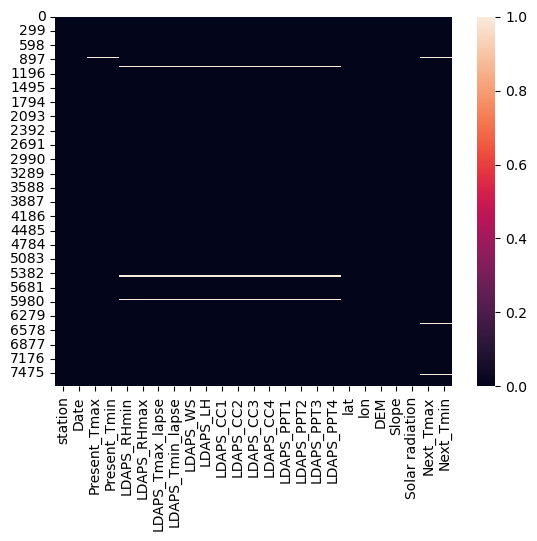

In [108]:
sns.heatmap(df.isnull())

## Filling null values with mean or mediun for numerical data

In [109]:
df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].mean())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].mean())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].mean())
df["Next_Tmax"] = df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"] = df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

In [110]:
# Checking for null values again
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [111]:
# dropping remaining null values
df=df.dropna()

In [112]:
# converting into int
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)


In [113]:
# Checking for null values again
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

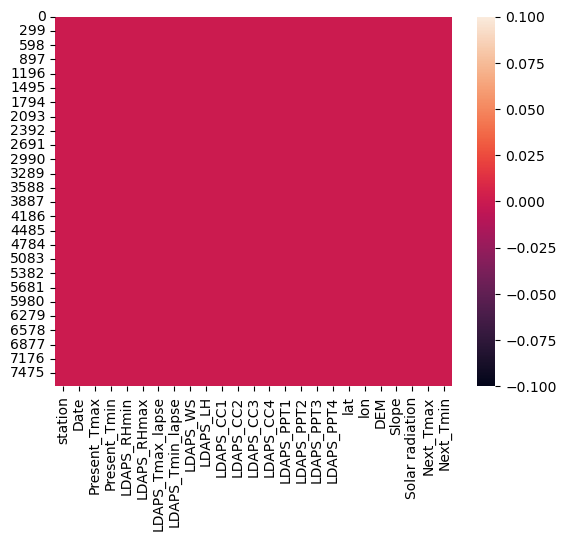

In [114]:
sns.heatmap(df.isnull())

In [115]:
# checking for white space
# Iterate through each column of the dataframe and check for white spaces
for col in df.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(f"Column '{col}' has {num_spaces} white spaces.")

Column 'station' has 0 white spaces.
Column 'Date' has 0 white spaces.
Column 'Present_Tmax' has 0 white spaces.
Column 'Present_Tmin' has 0 white spaces.
Column 'LDAPS_RHmin' has 0 white spaces.
Column 'LDAPS_RHmax' has 0 white spaces.
Column 'LDAPS_Tmax_lapse' has 0 white spaces.
Column 'LDAPS_Tmin_lapse' has 0 white spaces.
Column 'LDAPS_WS' has 0 white spaces.
Column 'LDAPS_LH' has 0 white spaces.
Column 'LDAPS_CC1' has 0 white spaces.
Column 'LDAPS_CC2' has 0 white spaces.
Column 'LDAPS_CC3' has 0 white spaces.
Column 'LDAPS_CC4' has 0 white spaces.
Column 'LDAPS_PPT1' has 0 white spaces.
Column 'LDAPS_PPT2' has 0 white spaces.
Column 'LDAPS_PPT3' has 0 white spaces.
Column 'LDAPS_PPT4' has 0 white spaces.
Column 'lat' has 0 white spaces.
Column 'lon' has 0 white spaces.
Column 'DEM' has 0 white spaces.
Column 'Slope' has 0 white spaces.
Column 'Solar radiation' has 0 white spaces.
Column 'Next_Tmax' has 0 white spaces.
Column 'Next_Tmin' has 0 white spaces.


This dataset contains no white spaces

In [116]:
#Check for duplicate data
df.duplicated().sum()

0

No duplicates in database

In [117]:
df.nunique().to_frame('No of unique values')

,No of unique values
station,25
Date,310
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


In [118]:
#Checking description of dataset
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,735798.661290,29.768461,23.225736,56.758753,88.377102,29.613841,23.512993,7.096514,62.495367,...,0.482338,0.276227,0.267328,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275435,22.932835
std,7.211568,521.344711,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,...,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,734875.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.500000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,...,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


<AxesSubplot:>

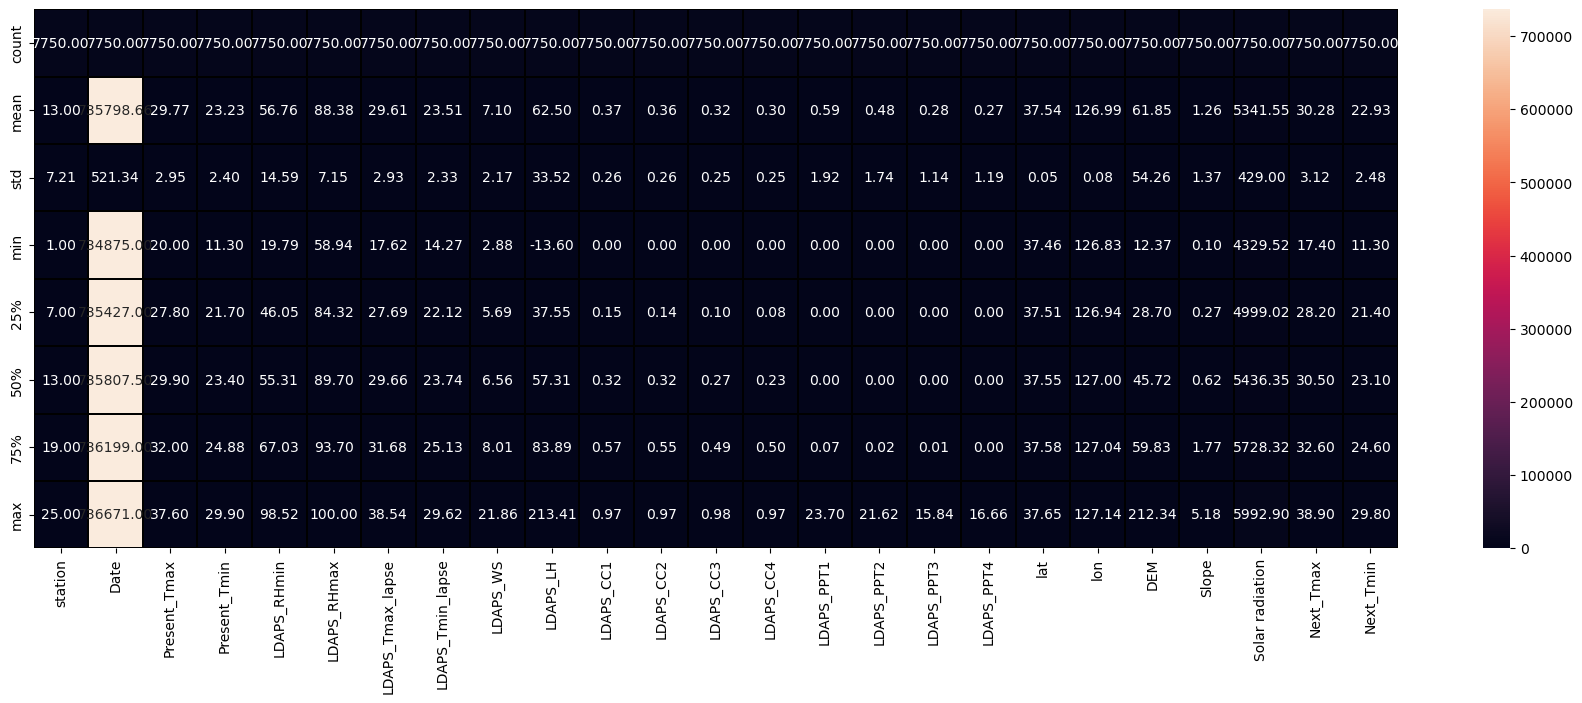

In [119]:
# visualize df.describe
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

- Count value is same for all columns i.e. no null value is present.
- Left Skewed data and right skewed data is present in maximum columns.
- Some columns have Normally distributed data 
- Some column have a huge difference between 75% and max value, so there is possiblity to have outliers

# Visualization of Data

# 1. Univariate Analysis

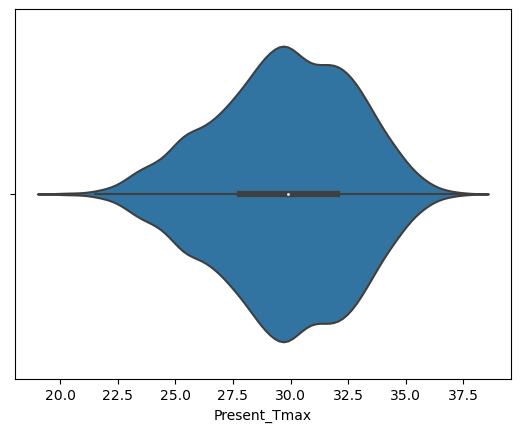

<Figure size 2000x800 with 0 Axes>

In [120]:
#Violin plot to check present maximum temp
sns.violinplot(df['Present_Tmax'])
plt.figure(figsize=(20,8))
plt.show()

- We can see the present maximum temp is registered as 20.0 degrees and sometimes even above 37 degrees

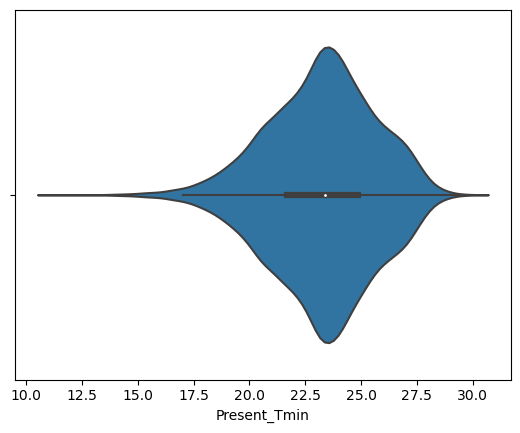

<Figure size 2000x800 with 0 Axes>

In [121]:
#Violin plot to check present maximum temp
sns.violinplot(df['Present_Tmin'])
plt.figure(figsize=(20,8))
plt.show()

-  - We can see the present minimum temp is registered as nearby 10 degrees and sometimes near 30 degrees

# 2. Bivariate Analysis

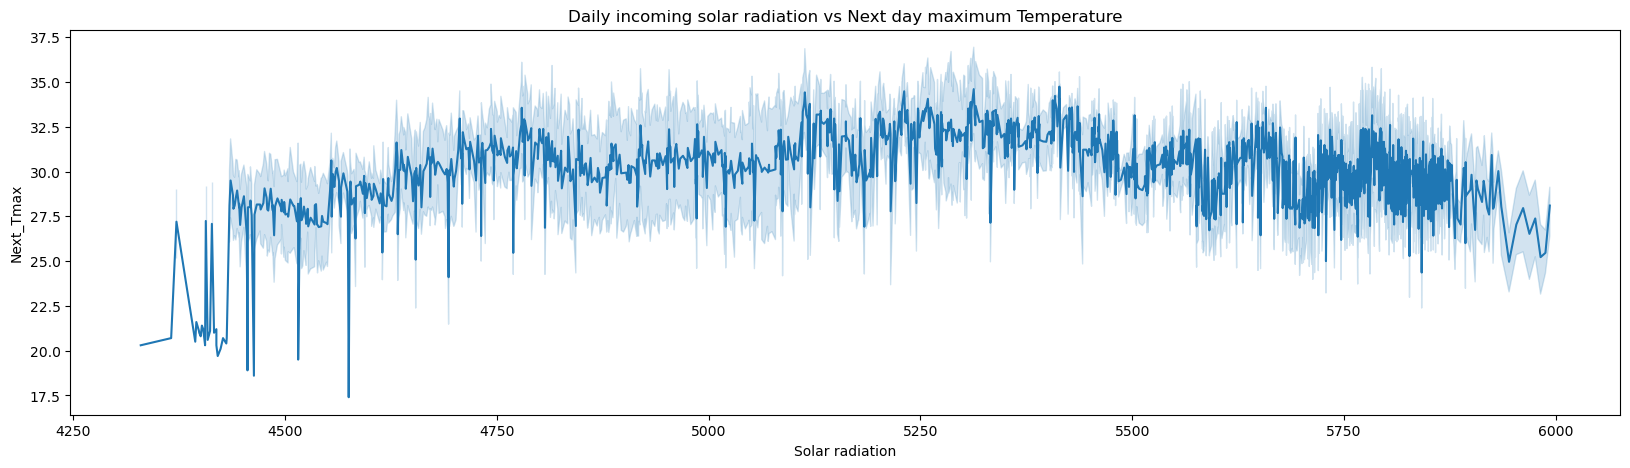

In [122]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

- We can see that,as solar radiation increases, next day max temperature also increases.

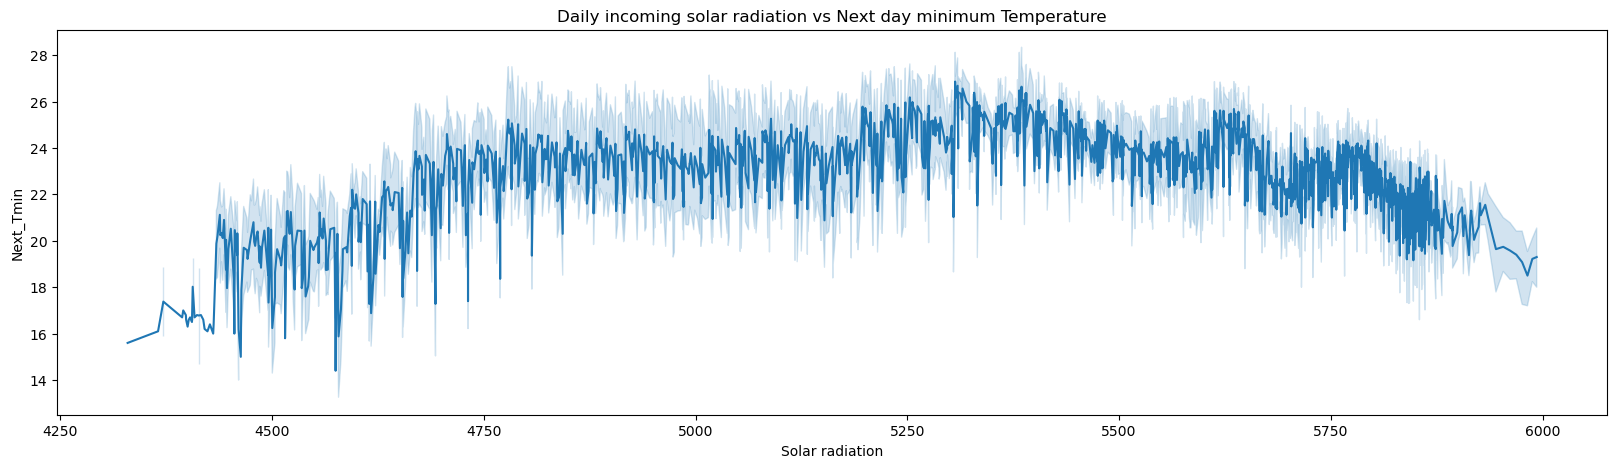

In [123]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

- We can see the next day minimum temparature is frequently increases as solar radiations increases.

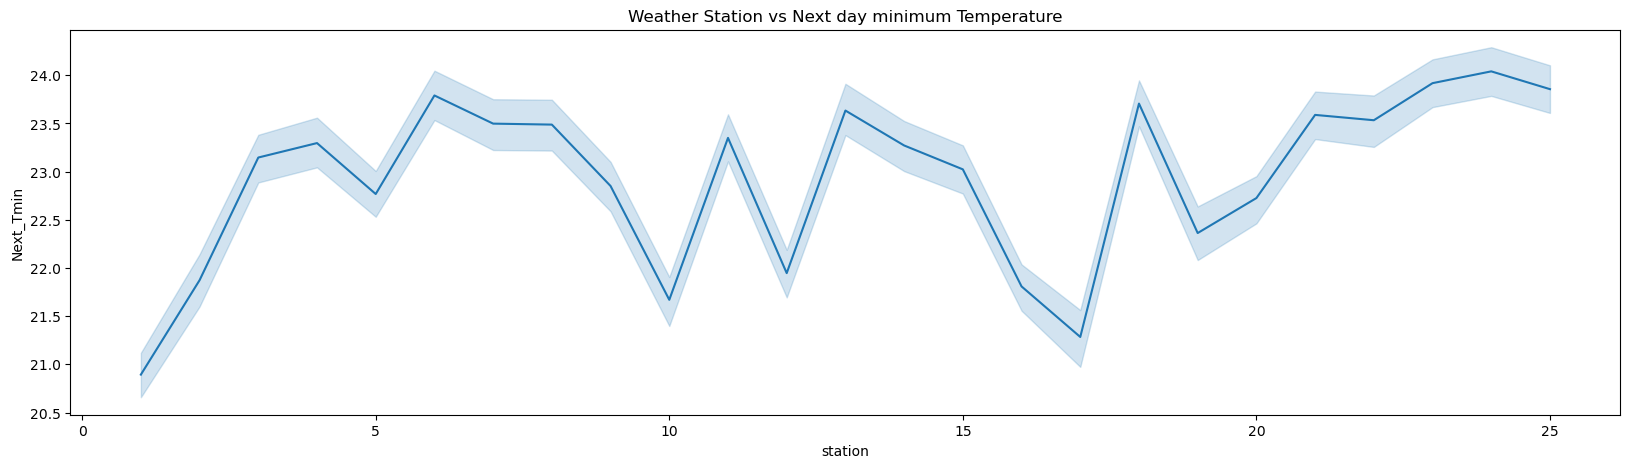

In [124]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

- We can observe that,the line plot clears that next day minimum temparature is high & low between station 15 to 20 respectively.

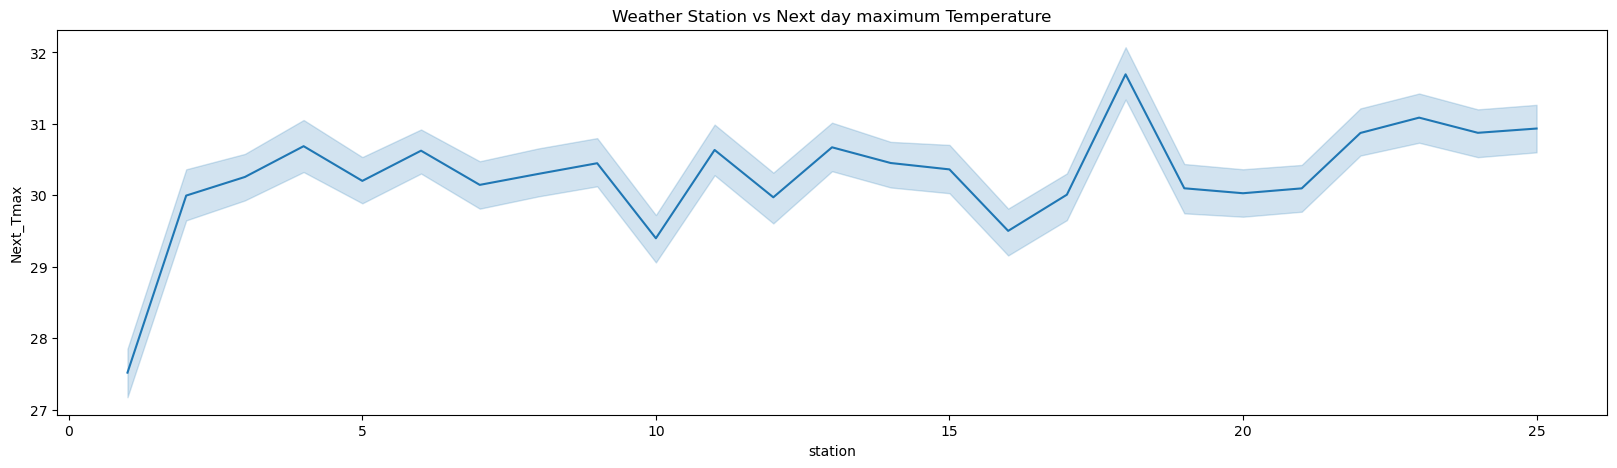

In [125]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

- Here we observed that, line plot clears that next day maximum temparature is high & low between station 15 to 20 respectively.

Text(0, 0.5, 'Next_Tmin')

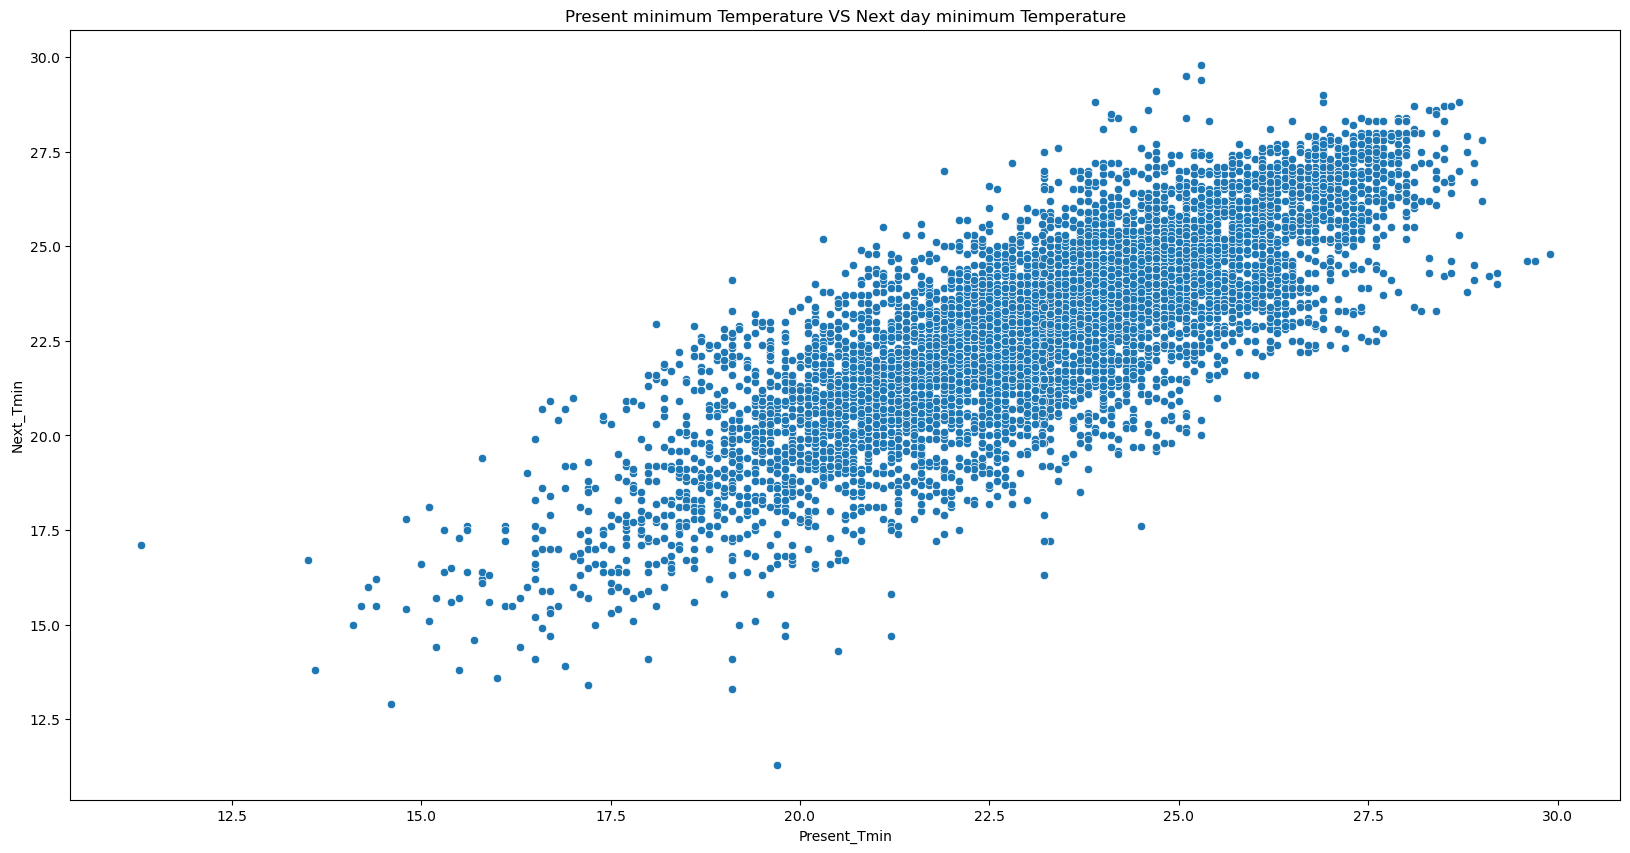

In [126]:
# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

- Here we can notice when Present_Tmin In decreasing , Next_Tmin also getting lower

Text(0, 0.5, 'Next_Tmax')

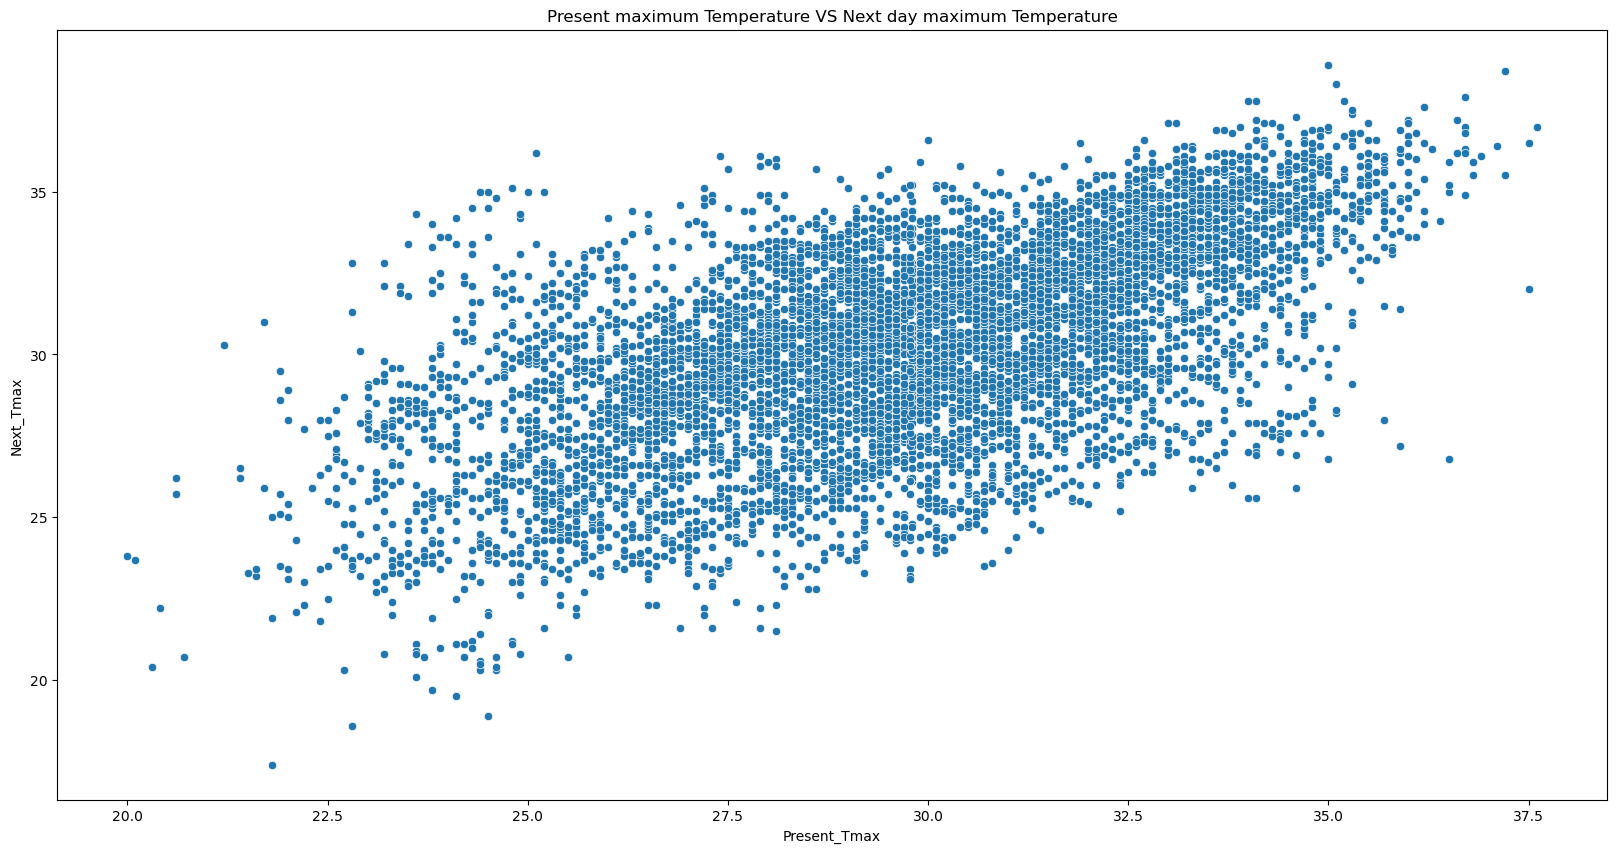

In [127]:
# Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

- Here we can see when Present_Tmax is increasing Nex_Tmax is also getting higher

# Distribution plot to check skewness in the features

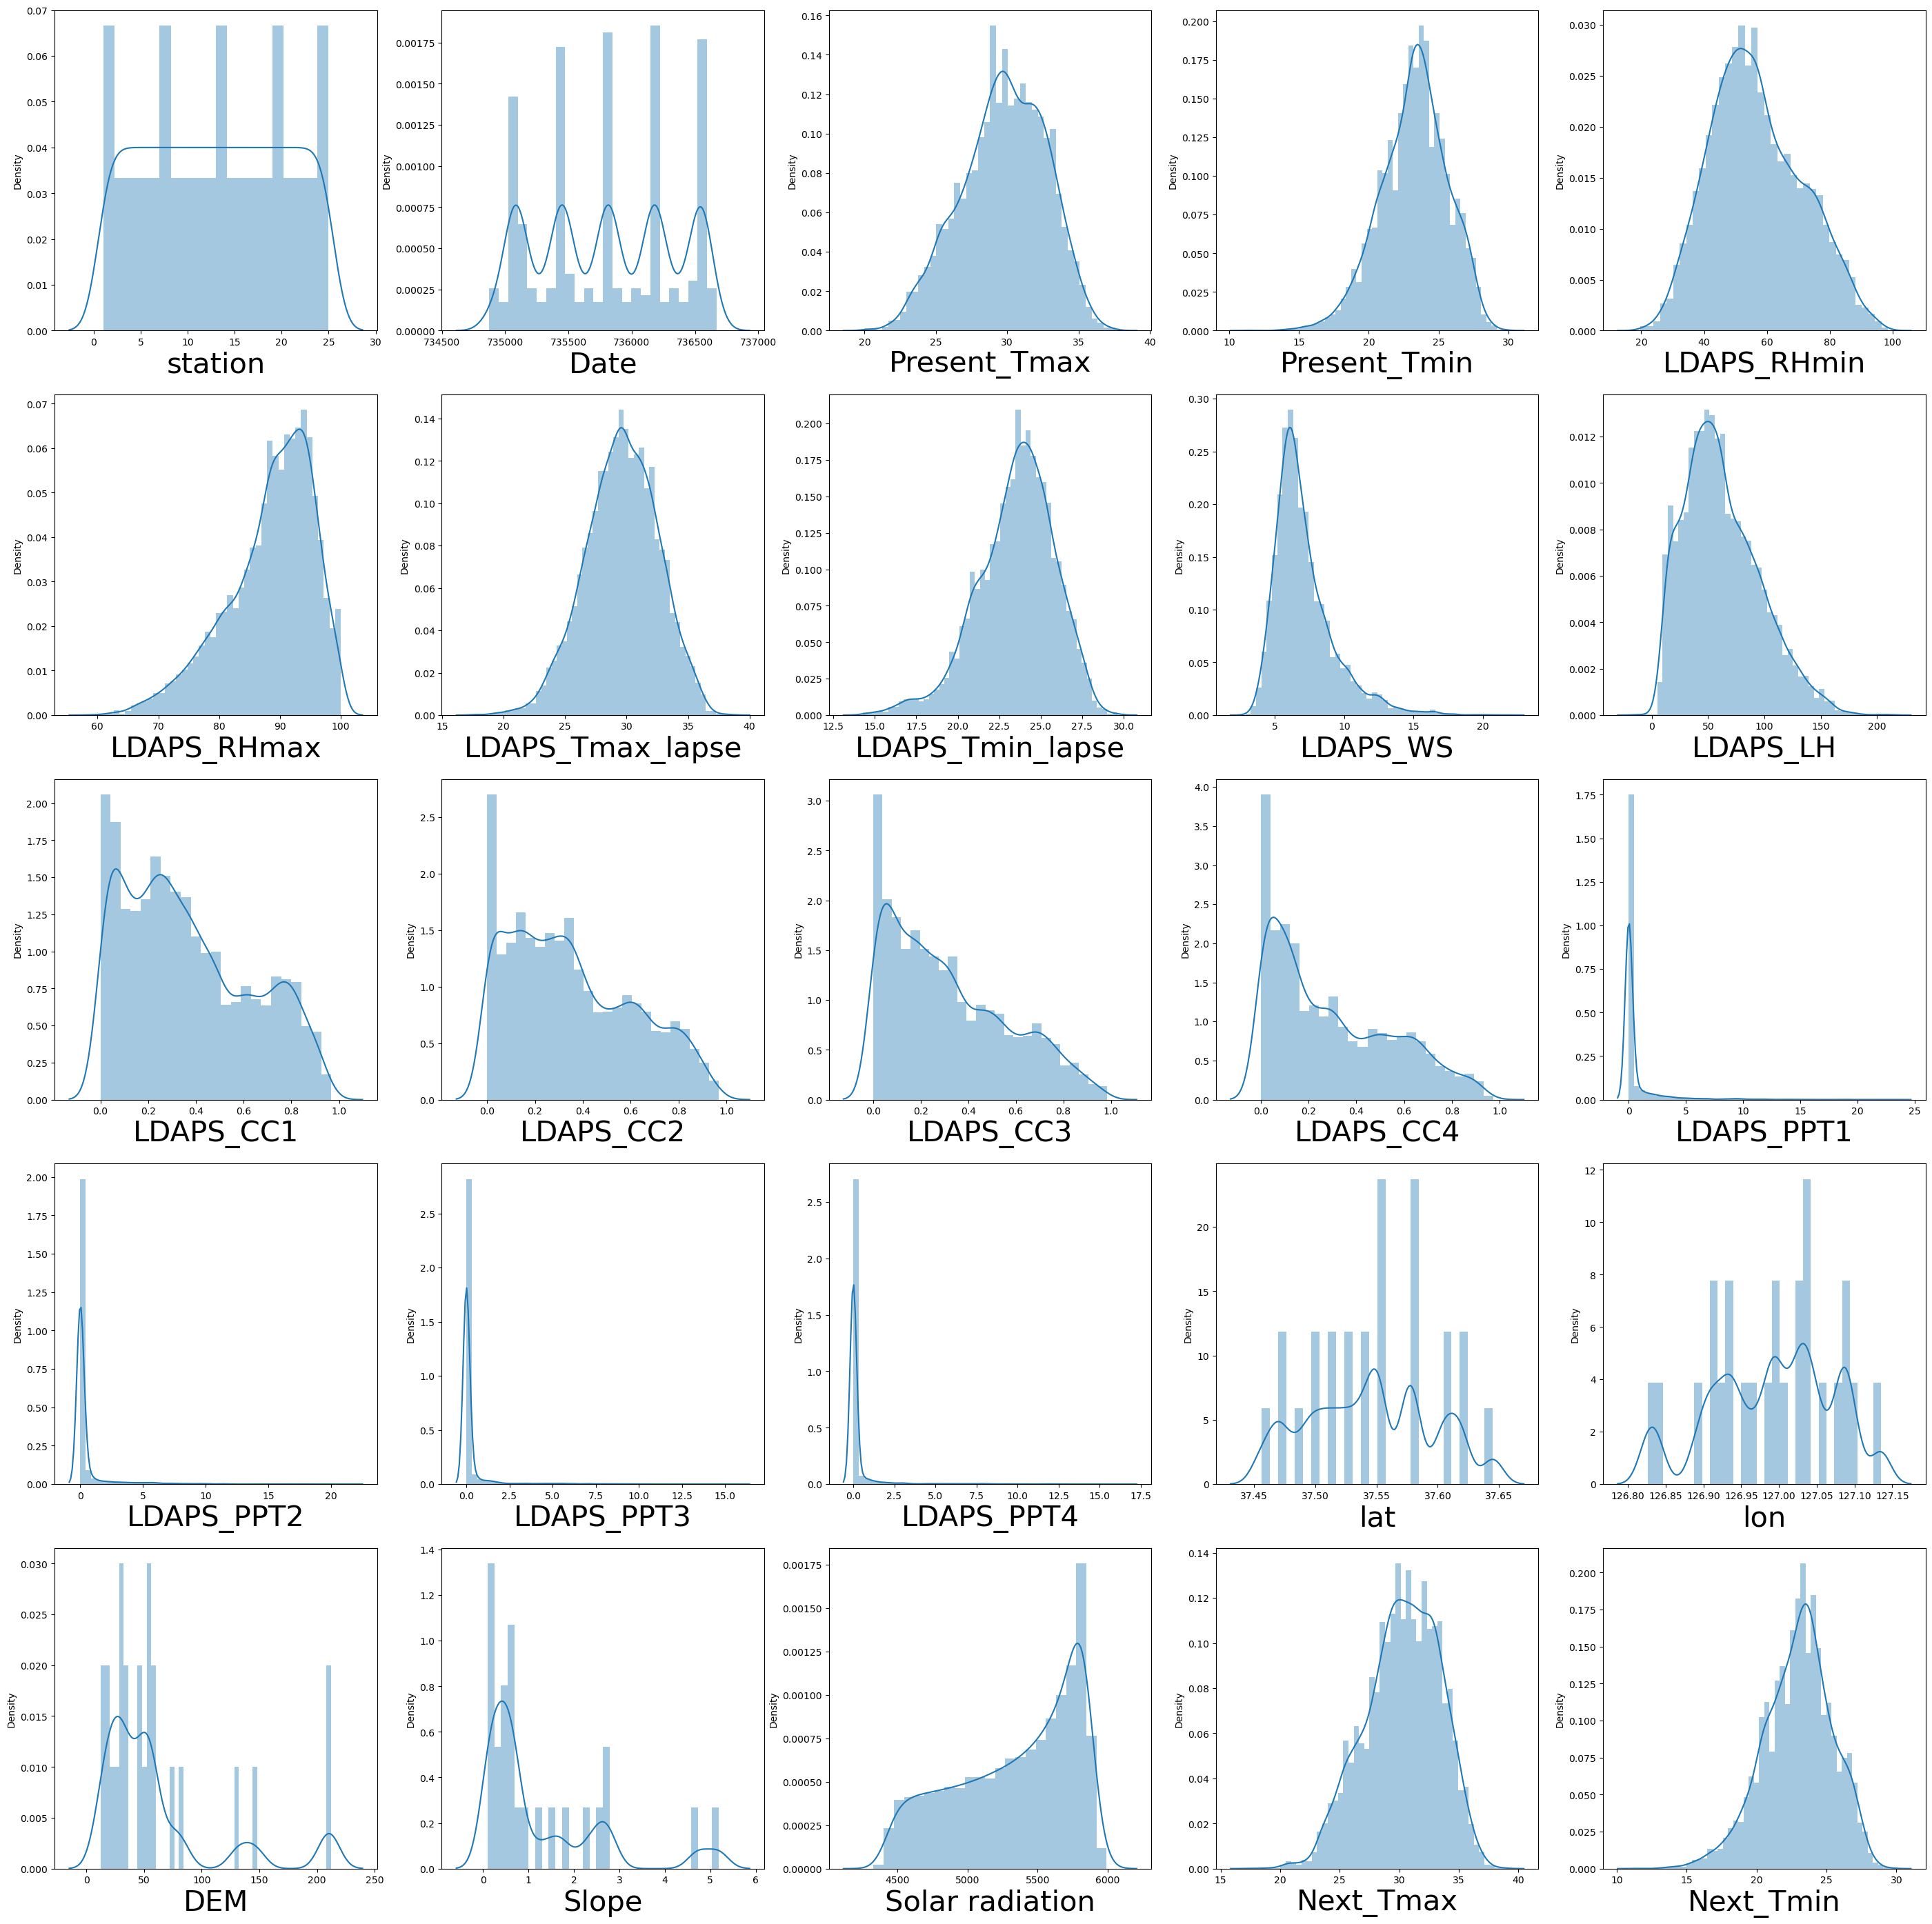

In [128]:
plt.figure(figsize=(35,35))
plotnumber=1

for column in df:
    if plotnumber<=25:  
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=30)
    plotnumber +=1
plt.show()


- As we can see Present_Tmax,LDAPS_RHmin are normally distributed.
- Left skewed -'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','Solar radiation'
- Right skewed- 'LDAPS_WS','LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4'
- Outeliers are present in 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope' columns.

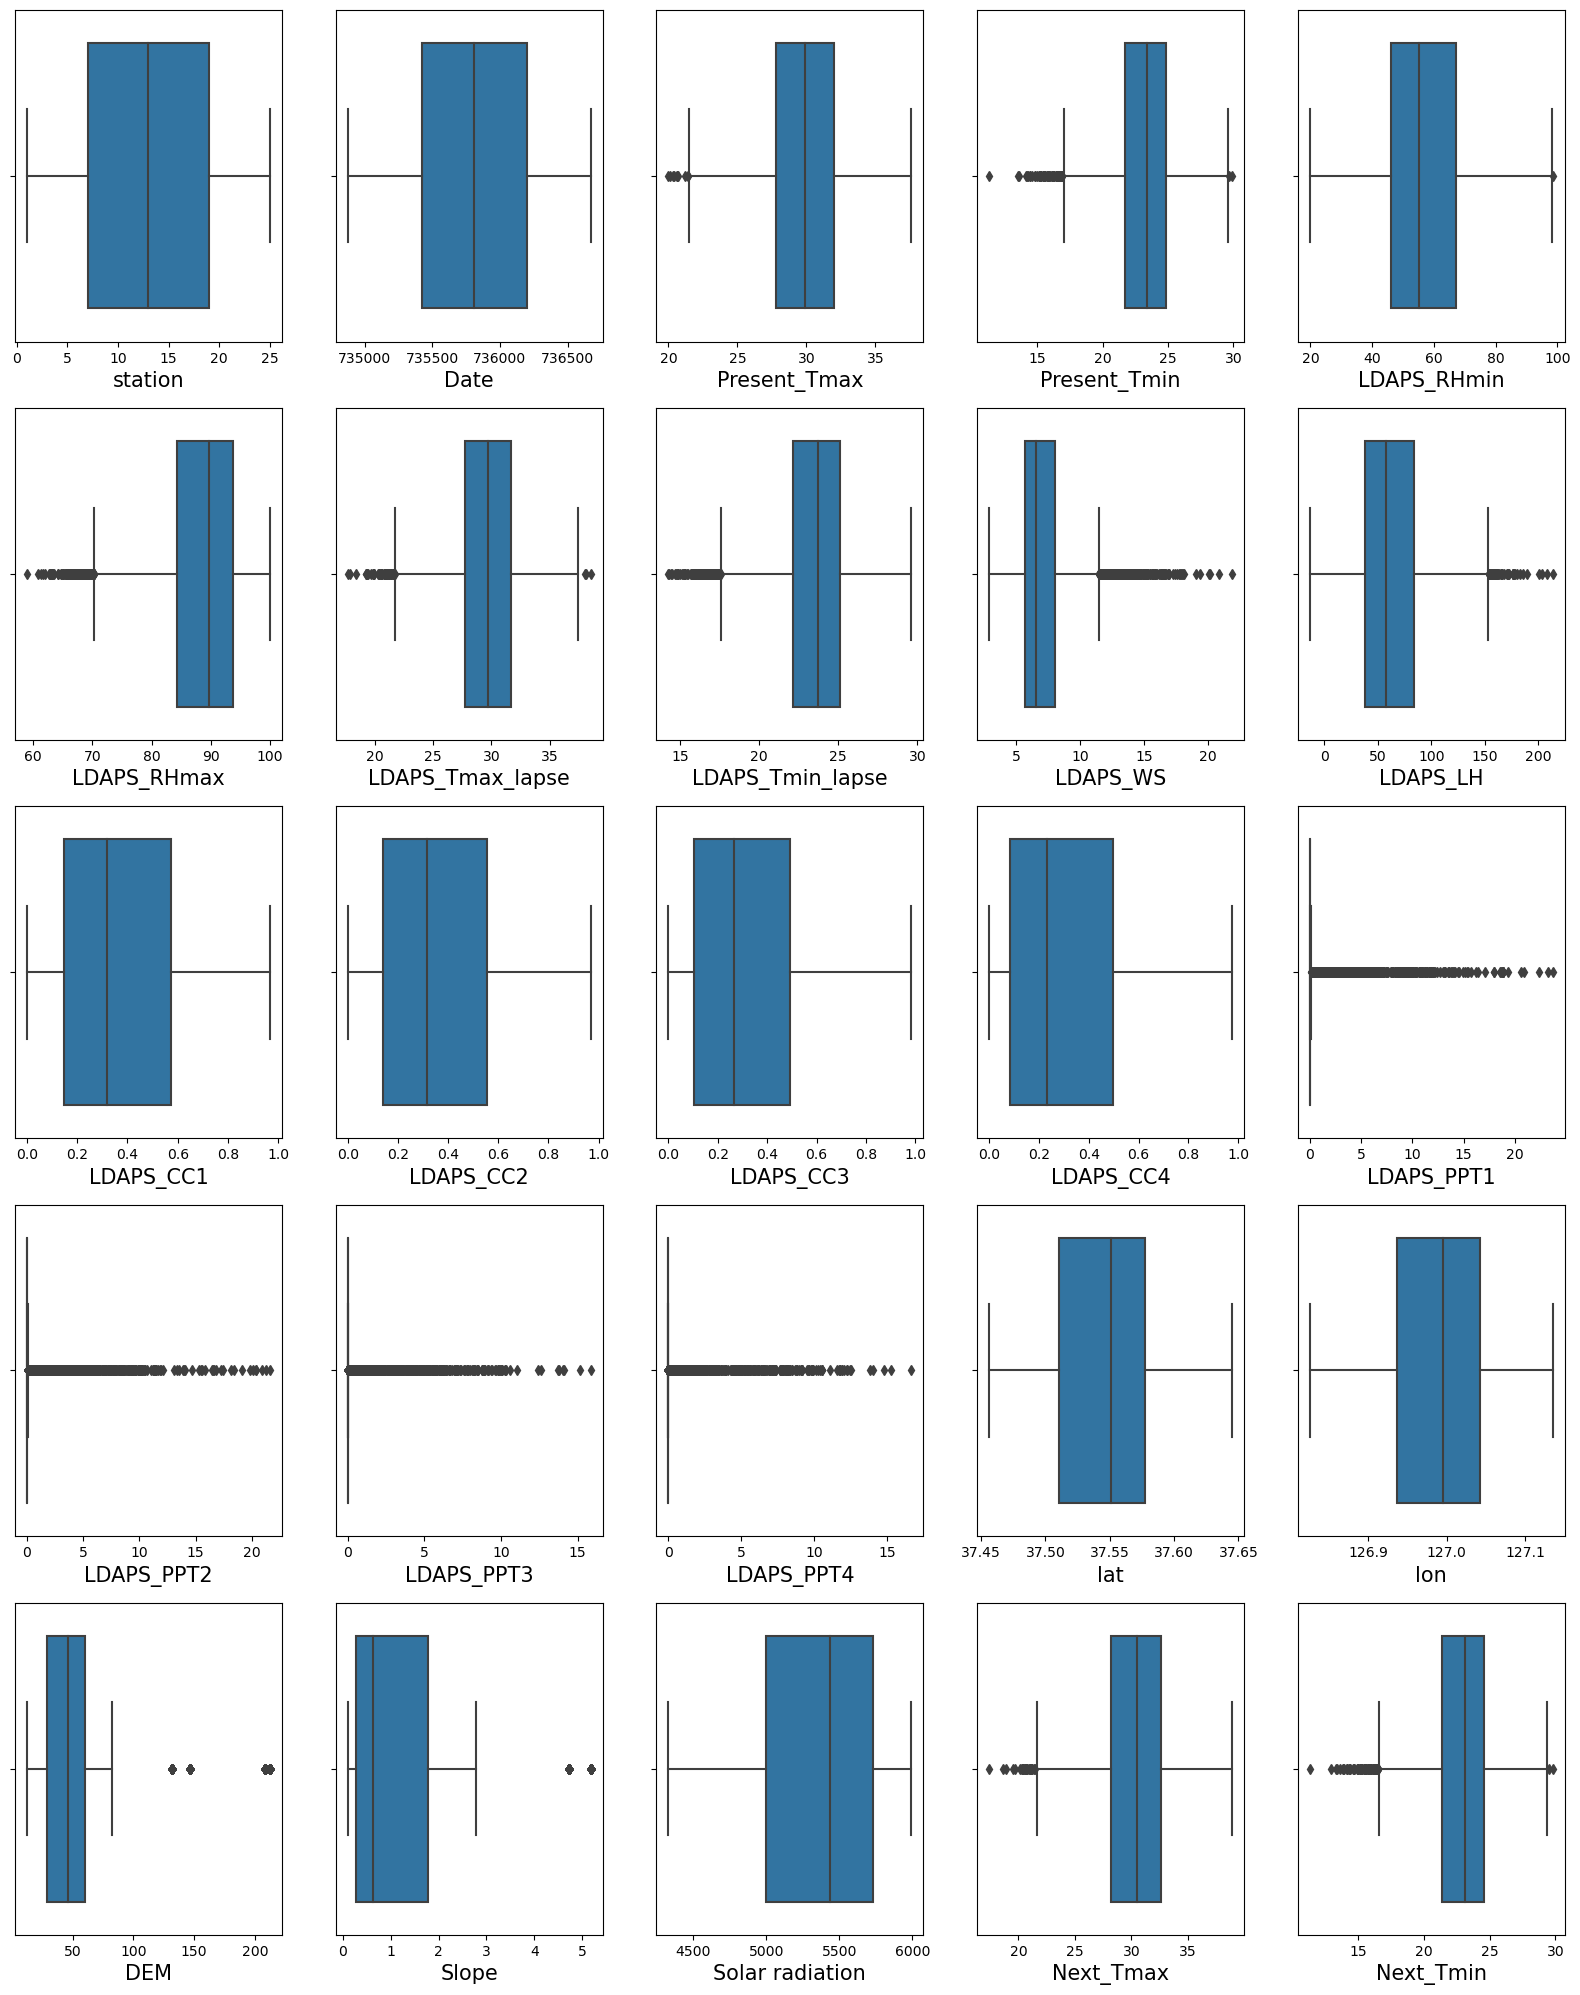

In [129]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=25: 
        plt.subplot(5,5,graph)
        ax=sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

- We can observe that there are outliers present in columns 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope'.

# Checking Correlation

In [130]:
df.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000e+00,2.553602e-17,0.112786,0.131922,-0.066796,-0.167196,0.069223,0.104911,0.005294,-0.133575,...,-0.008328,-0.012609,-0.010529,-2.376097e-01,-1.187626e-01,-2.559703e-01,-9.011266e-02,-0.019011,0.108155,0.128539
Date,2.553602e-17,1.000000e+00,0.057018,0.035058,-0.010089,-0.146134,0.010639,-0.011033,-0.121704,0.053534,...,-0.048631,0.051987,0.028470,1.441857e-12,8.746050e-13,4.247549e-16,1.425033e-15,-0.054862,0.054196,0.017762
Present_Tmax,1.127860e-01,5.701827e-02,1.000000,0.617699,-0.207063,-0.304833,0.568958,0.622538,-0.125517,0.133333,...,-0.104792,-0.126706,-0.105768,-5.413219e-02,7.526809e-03,-1.887788e-01,-1.073332e-01,-0.027008,0.609320,0.621706
Present_Tmin,1.319217e-01,3.505796e-02,0.617699,1.000000,0.120862,-0.018417,0.462182,0.762218,-0.038555,-0.012366,...,0.064422,-0.051820,-0.068977,-8.051933e-02,-4.555963e-02,-2.525178e-01,-1.483003e-01,0.051659,0.469904,0.795860
LDAPS_RHmin,-6.679610e-02,-1.008903e-02,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.292438,-0.073447,...,0.390469,0.238624,0.165641,8.590934e-02,-7.769602e-02,1.009442e-01,1.225974e-01,0.243102,-0.441382,0.092732
LDAPS_RHmax,-1.671955e-01,-1.461343e-01,-0.304833,-0.018417,0.578472,1.000000,-0.377319,-0.117110,0.133479,0.237121,...,0.228819,0.133394,0.116427,1.947819e-01,2.422561e-02,1.764229e-01,2.189528e-01,0.147954,-0.287324,-0.075301
LDAPS_Tmax_lapse,6.922327e-02,1.063933e-02,0.568958,0.462182,-0.568528,-0.377319,1.000000,0.652948,-0.317239,0.045198,...,-0.249766,-0.196162,-0.168065,-4.389584e-02,8.905060e-02,-1.808676e-01,-1.642717e-01,0.046232,0.826628,0.585410
LDAPS_Tmin_lapse,1.049107e-01,-1.103320e-02,0.622538,0.762218,0.087426,-0.117110,0.652948,1.000000,-0.133944,-0.137862,...,-0.003375,-0.094489,-0.100741,-9.801410e-02,-2.843003e-02,-1.972517e-01,-1.876267e-01,0.158569,0.585726,0.879808
LDAPS_WS,5.294066e-03,-1.217038e-01,-0.125517,-0.038555,0.292438,0.133479,-0.317239,-0.133944,1.000000,0.002215,...,0.183573,0.152102,0.134116,3.459925e-02,-6.180064e-02,1.891089e-01,1.695535e-01,0.120288,-0.347854,-0.100688
LDAPS_LH,-1.335752e-01,5.353448e-02,0.133333,-0.012366,-0.073447,0.237121,0.045198,-0.137862,0.002215,1.000000,...,-0.085559,0.008335,0.012161,1.318271e-01,2.421591e-02,5.337541e-02,8.506192e-02,-0.049060,0.155309,-0.058622


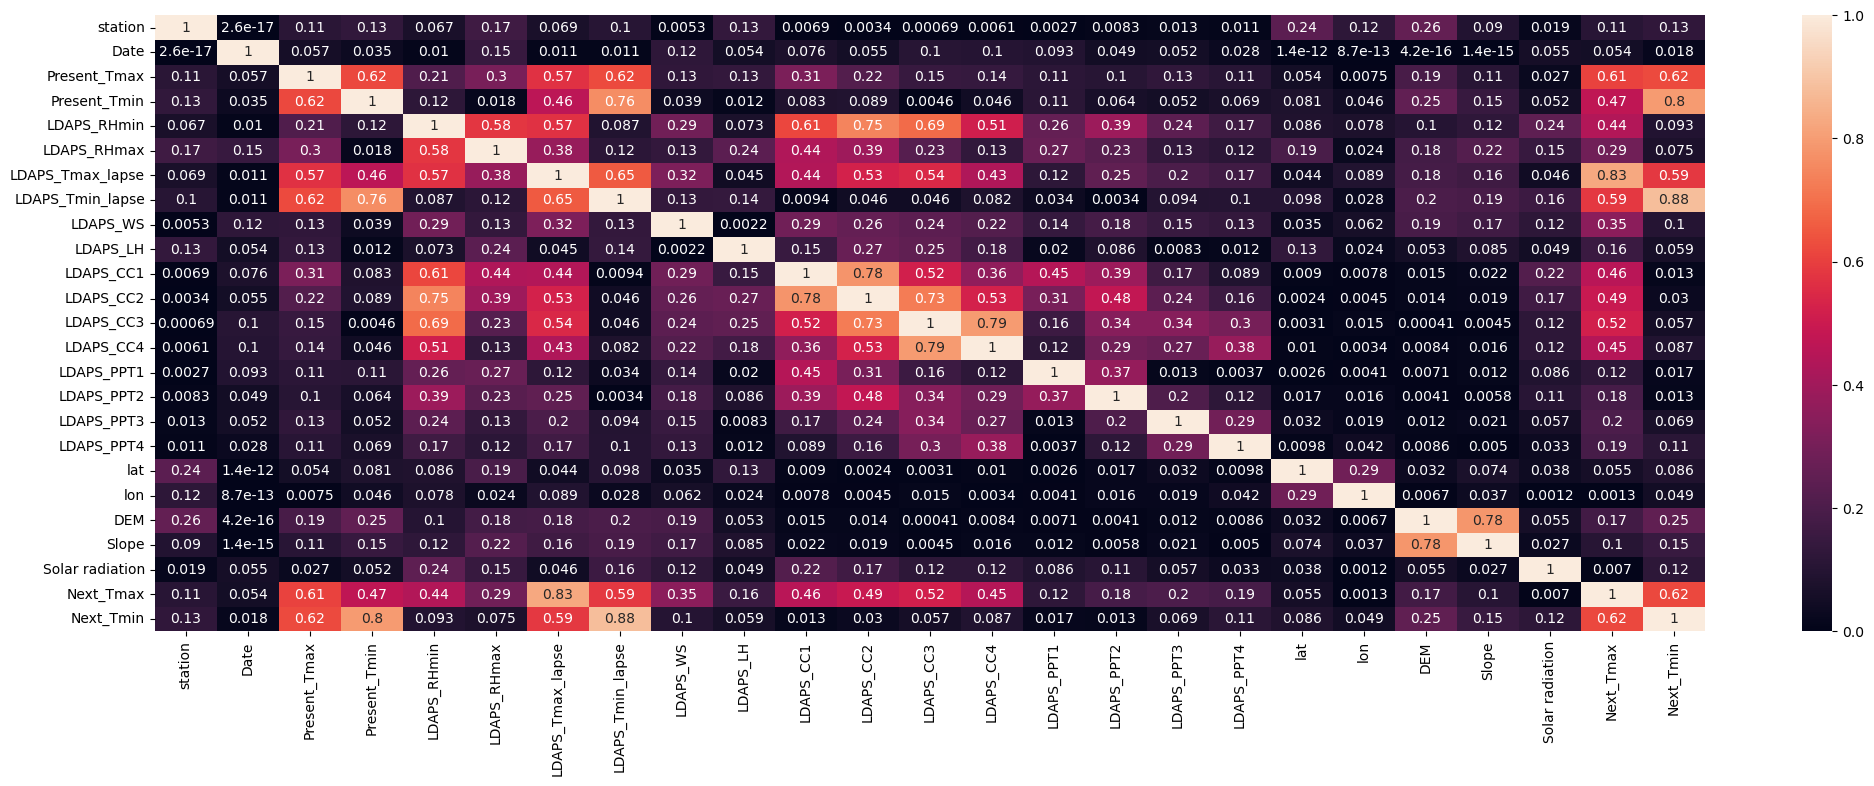

In [131]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=df.corr().abs()
plt.figure(figsize=(25,8))
sns.heatmap(df_corr, annot=True)
plt.show()

#### Correlation with Next_Tmax,
- As we observed,'LDAPS_Tmax_lapse','Present_Tmax','LDAPS_Tmin_lapse', 'Present_Tmin', 'LDAPS_LH','station', are positively correlated with Next_Tmax.
- As we observed,'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT4','LDAPS_PPT3', 'DEM', 'Slope','LDAPS_RHmin','LDAPS_WS'are negatively correlated with Next_Tmax

#### Correlation with Next_Tmin
- As we observed, 'Present_Tmax', 'Present_Tmin','LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse','Solar radiation' are positively correlated with Next_Tmin
- As we observed, 'LDAPS_LH', 'LDAPS_CC1','LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope' are negatively correlated with Next_Tmin

- 1.Independent with W(target variable):-  H,AB 
2. Negative correlation with W(target variable):-
   Strong negative correlation:- RA, ER and ERA
   Least negative correlation:- AB, E, SB,3B
3. Positive correlation with W(target variable):-
   Strong positive correlation:- SV, BB,SHO,R,2B
   Least positive correlation:- SO,CG

4. We find multicollinarity in some column.

# Detecting Outliers and Treating them

# Method 1: Z-Score


In [132]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664101,1.438031,0.361782,0.761303,0.102641,0.383191,0.525837,0.217124,0.128153,0.207567,...,0.277548,0.241743,0.225419,1.189704,0.005038,2.773649,1.115761,1.518401,0.377009,0.699093
1,1.525426,1.438031,0.721742,0.677906,0.308235,0.311618,0.080886,0.223971,0.648374,0.315028,...,0.277548,0.241743,0.225419,1.189704,0.511327,0.315050,0.542139,1.230307,0.072027,0.174622
2,1.386750,1.438031,0.620161,0.030967,0.553222,0.616001,0.163054,0.451635,0.442347,1.250882,...,0.277548,0.241743,0.225419,0.653264,0.838778,0.526200,0.723195,1.216887,0.264471,0.390192
3,1.248075,1.438031,0.755602,0.072665,0.101551,1.134018,0.031005,0.080153,0.667687,0.096430,...,0.277548,0.241743,0.225419,1.992377,0.385384,0.297473,0.933099,1.201522,0.456915,0.551567
4,1.109400,1.438031,0.552441,0.552811,0.040089,0.248725,0.170723,0.011375,0.628473,1.356743,...,0.277548,0.241743,0.225419,0.118811,1.808536,0.494290,0.548418,1.207554,0.296545,0.174622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.109400,1.481531,2.257950,2.262447,2.198944,1.415073,0.615110,2.235342,0.227689,1.577876,...,0.277548,0.241743,0.225419,0.118811,0.612081,0.655386,0.499795,2.064311,0.858118,2.111128
7746,1.248075,1.481531,2.461111,2.429240,1.828278,0.655669,0.993432,2.445137,0.613204,0.586358,...,0.277548,0.241743,0.225419,0.685848,1.191417,0.735219,0.820220,2.097462,0.729822,2.353191
7747,1.386750,1.481531,2.190230,2.554336,2.058222,1.329954,1.113925,2.032545,0.437410,0.285339,...,0.277548,0.241743,0.225419,0.149408,1.264464,0.852800,0.804013,2.093941,0.633600,1.949752
7748,1.525426,1.481531,2.190230,2.304145,2.243401,1.550262,0.889173,2.050634,0.255585,0.455147,...,0.277548,0.241743,0.225419,0.417628,1.037767,0.821318,0.755171,2.105458,0.537379,1.667345


In [133]:
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))

In [134]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(6888, 25)

In [135]:
print("df.shape:",df.shape, "\ndf_new.shape:",df_new.shape)

df.shape: (7750, 25) 
df_new.shape: (6888, 25)


In [136]:
#data loss in percentage
Data_loss =((df.shape[0]-df_new.shape[0])/df.shape[0])*100
Data_loss

11.122580645161289

- Data loss with z score method is 11%

# Method 2: IQR(Inter Quartile) Method

In [137]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1

df_new2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [138]:
print("df.shape:",df.shape, "\ndf_new.shape:",df_new2.shape)

df.shape: (7750, 25) 
df_new.shape: (3263, 25)


In [139]:
#data loss in percentage
Data_loss =((df.shape[0]-df_new2.shape[0])/df.shape[0])*100
Data_loss

57.89677419354838

### The Data Loss in IQR method is very high, so we will be going with Z-score method.

In [140]:
# Reassigning obtained value to original dataframe
df=df_new
df.shape

(6888, 25)

# Checking Skewness

In [141]:
df.skew()

station             0.002824
Date                0.009739
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            1.088575
LDAPS_LH            0.569060
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.700518
LDAPS_CC4           0.711008
LDAPS_PPT1          3.723069
LDAPS_PPT2          4.859920
LDAPS_PPT3          5.479300
LDAPS_PPT4          5.926613
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
Next_Tmax          -0.268494
Next_Tmin          -0.238379
dtype: float64

- Acceptable range for skewness is +/- 0.5, skewness more than+/- 0.5 will we treated


In [142]:
# Applying transformation method to treat the skewness

from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [143]:
df.skew()

station             0.002824
Date                0.009739
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.098555
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            0.006047
LDAPS_LH           -0.029450
LDAPS_CC1           0.062784
LDAPS_CC2           0.047112
LDAPS_CC3           0.090291
LDAPS_CC4           0.137827
LDAPS_PPT1          1.549961
LDAPS_PPT2          1.738631
LDAPS_PPT3          1.903125
LDAPS_PPT4          2.159766
lat                 0.108039
lon                -0.275324
DEM                 0.038756
Slope               0.234034
Solar radiation    -0.166097
Next_Tmax          -0.268494
Next_Tmin          -0.238379
dtype: float64

- as we can see here skewness is removed.

# diving data in (features)x and (lables)y

In [144]:
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]


# Data Scaling

In [145]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale,columns=x.columns)

In [146]:
x=pd.DataFrame(data=x_scale)
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.671640,-1.444558,-0.434229,-0.828313,0.192637,0.349021,-0.663279,-0.291150,0.171472,0.348427,...,-0.521443,-0.537588,-0.497816,-0.475038,-0.427723,1.215021,0.002447,1.855030,1.330634,1.889143
1,-1.532756,-1.444558,0.687209,-0.741633,-0.241178,0.261167,-0.013229,0.172937,-0.583341,-0.171766,...,-0.541636,-0.537588,-0.497816,-0.475038,-0.427723,1.215021,0.516937,0.070309,-0.373363,1.434143
2,-1.393873,-1.444558,0.582074,-0.004851,-0.499842,-0.725632,0.074807,0.412468,-0.259520,-1.388700,...,-0.452044,-0.537588,-0.497816,-0.475038,-0.427723,0.674208,0.843199,-0.352909,-0.942761,1.413799
3,-1.254990,-1.444558,0.722254,0.038489,0.191486,1.384801,-0.066672,-0.147040,-0.615638,0.243635,...,-0.500663,-0.537588,-0.497816,-0.475038,-0.427723,2.024238,0.391451,0.099376,1.252120,1.390598
4,-1.116107,-1.444558,0.511985,-0.611613,0.041939,0.185439,-0.282806,-0.074677,-0.550428,1.304063,...,-0.287153,-0.537588,-0.497816,-0.475038,-0.427723,0.135398,1.809436,-0.278275,-0.389897,1.399694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883,1.106025,1.497834,-2.396746,-2.388557,-2.237442,-1.377127,-0.758926,-2.414566,0.042244,-2.024327,...,-1.461176,-0.537588,-0.497816,-0.475038,-0.427723,0.135398,0.617325,-0.712475,-0.266692,-1.769638
6884,1.244908,1.497834,-2.607015,-2.561917,-1.846082,-0.761998,-1.164265,-2.635296,-0.525425,0.686638,...,-1.346899,-0.537588,-0.497816,-0.475038,-0.427723,-0.675822,1.194558,-0.999203,-1.353296,-1.787610
6885,1.383792,1.497834,-2.326656,-2.691938,-2.088864,-1.315434,-1.293363,-2.201198,-0.252196,0.420156,...,-1.499748,-0.537588,-0.497816,-0.475038,-0.427723,-0.135009,-1.252407,-1.576420,-1.277985,-1.785711
6886,1.522675,1.497834,-2.326656,-2.431897,-2.284381,-1.471606,-1.052561,-2.220230,0.004869,-0.325115,...,-1.499748,-0.537588,-0.497816,-0.475038,-0.427723,-0.405415,-1.026533,-1.397274,-1.067963,-1.791913


- We scaled the data using Standerd Scalarization

# Checking Multi-Collinearity

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_function():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_function()

    VIF Factor          Features
0     1.288551           station
1     1.128501              Date
2     2.736489      Present_Tmax
3     3.046872      Present_Tmin
4     5.919683       LDAPS_RHmin
5     2.537623       LDAPS_RHmax
6     6.701187  LDAPS_Tmax_lapse
7     6.985656  LDAPS_Tmin_lapse
8     1.199283          LDAPS_WS
9     1.485645          LDAPS_LH
10    4.347281         LDAPS_CC1
11    5.152775         LDAPS_CC2
12    4.616545         LDAPS_CC3
13    2.790906         LDAPS_CC4
14    2.267760        LDAPS_PPT1
15    1.969742        LDAPS_PPT2
16    1.686605        LDAPS_PPT3
17    1.638395        LDAPS_PPT4
18    1.287833               lat
19    1.220720               lon
20    3.230095               DEM
21    2.828852             Slope
22    1.212236   Solar radiation


- Acceptable range of VIF is 10.
- No Multi-Collinearity 

# Data Modelling for Next_Tmax

In [156]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [149]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y1_train)
    pred = lr.predict(x_test)
    acc=r2_score(y1_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.7682821721828994  on Random_state  571


# Splitting data into Train-Test

In [150]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.30,random_state=maxRS)

In [151]:
x_train.shape

(4821, 23)

In [152]:
x_test.shape

(2067, 23)

In [153]:
y1_train.shape

(4821,)

In [154]:
y1_test.shape

(2067,)

In [157]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR(),AdaBoostRegressor(),Lasso(alpha=0.1)]
for m in model:
    print("===============================================================================")
    print('Accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=5)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")


Accuracy score of : LinearRegression()
R2 Score:                 0.7682821721828994
Mean Absolute Error:      1.0637313535730606
Mean Squared error:       2.016573248319845
Root Mean Squared Error:  1.420061001619242
[0.6644093  0.64851477 0.65616362 0.68670942 0.52097358]
cross validation score:   0.6353541370172865
Difference between R2 score and cross validatio score is :   0.1329280351656129
Accuracy score of : RandomForestRegressor()
R2 Score:                 0.9027208063481551
Mean Absolute Error:      0.6900049462739332
Mean Squared error:       0.8465926915700133
Root Mean Squared Error:  0.9201047177196807
[0.71072616 0.65389735 0.65359613 0.728454   0.50033917]
cross validation score:   0.6494025623238813
Difference between R2 score and cross validatio score is :   0.25331824402427383
Accuracy score of : DecisionTreeRegressor()
R2 Score:                 0.7526487105491693
Mean Absolute Error:      1.0390900308907272
Mean Squared error:       2.1526267441004925
Root Mean Squar

# We can see,difference  between  r2 score and cv score is least in Ridge Regression and Accuracy score is 76%

# We can choose Ridge Regression for Hyper parameter tuning

# Hyper Parameter Tuning

In [165]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 16, 'solver': 'sag'}

In [166]:
clf_pred=clf.best_estimator_.predict(x_test)

In [167]:
r2_score(y1_test, clf_pred)

0.7680340361098095

- After hyperparameter tuning, accuracy is 76.80% for our best model

# Saving the best Regressor model

In [169]:
import joblib

joblib.dump(clf.best_estimator_,'Temperature_Tmax.obj')

['Temperature_Tmax.obj']

In [170]:
best_model=joblib.load('Temperature_Tmax.obj')



In [171]:
# Viewing Attributes of the best model
best_model

Ridge(max_iter=10, random_state=16, solver='sag')

In [172]:
original = np.array(y1_test)
predicted = np.array(best_model.predict(x_test))
df_new1 = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new1

,Original,Predicted
0,35.1,34.595774
1,32.5,33.839502
2,27.5,28.896352
3,36.9,36.738732
4,28.2,27.108914
...,...,...
2062,25.3,28.549405
2063,30.2,30.281950
2064,28.8,30.534502
2065,33.4,31.344448


Text(0.5, 1.0, 'Original vs predicted  graph')

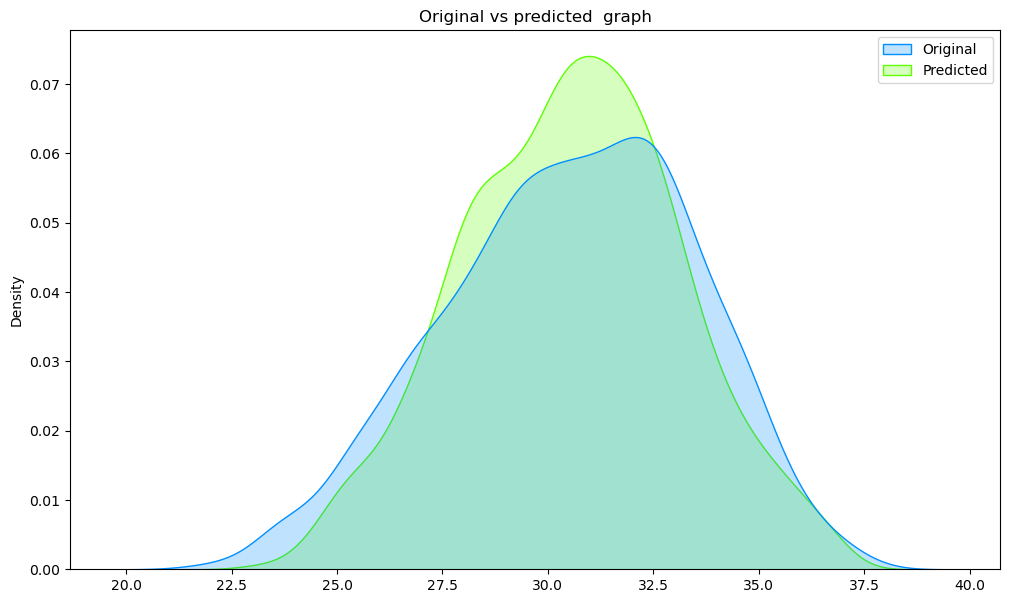

In [173]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## We can see the the predicted graph follows original graph majorly

# Data Modelling for Next_Tmin

In [175]:
# finding best randome state for Next_Tmin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8325433102135145  on Random_state  391


In [176]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [178]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR(),AdaBoostRegressor(),Lasso(alpha=0.1)]
for m in model:
    print("===============================================================================")
    print('Accuracy score of :', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=5)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")


Accuracy score of : LinearRegression()
R2 Score:                 0.8325433102135145
Mean Absolute Error:      0.7625134135097987
Mean Squared error:       0.9457226403438209
Root Mean Squared Error:  0.9724827198175919
[0.69657475 0.65652464 0.78652584 0.80083337 0.8023563 ]
cross validation score:   0.7485629784080622
Difference between R2 score and cross validatio score is :   0.08398033180545228
Accuracy score of : RandomForestRegressor()
R2 Score:                 0.9121645619958552
Mean Absolute Error:      0.5408521548286219
Mean Squared error:       0.4960563979316147
Root Mean Squared Error:  0.704312713169097
[0.56389102 0.69406705 0.80812511 0.83060183 0.83183618]
cross validation score:   0.7457042404968977
Difference between R2 score and cross validatio score is :   0.1664603214989575
Accuracy score of : DecisionTreeRegressor()
R2 Score:                 0.7854039877320226
Mean Absolute Error:      0.8245851102616435
Mean Squared error:       1.211945056289446
Root Mean Squar

## Gradient Boosting Regressor gives 89% r2 score.
## We choose Gradient Boosting Regressor for Hyper parameter tuning

## Hyper parameter tuning with Gradient Boosting Regressor

In [180]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
             'max_features':['sqrt', 'log2', 'auto'], 
             'criterion':['squared_error', 'friedman_mse'],
             'max_depth':[2,3,4],
             'n_estimators':[10,100,150,200]}

In [182]:
# Start Tuning 
gbr1=GradientBoostingRegressor()
GCV = GridSearchCV(gbr1,parameter,cv=4)

GCV.fit(x_train,y2_train)  
print(GCV.best_params_) 

{'criterion': 'friedman_mse', 'loss': 'huber', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [183]:
#Applying best parameter values on Gradient Boosting Regressor Algorithm 
best2=GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'huber', max_depth=4, max_features='auto', n_estimators= 200)
best2.fit(x_train,y2_train)
best2.score(x_train,y2_train)

0.9546386136914304

In [185]:
predgbr1=best2.predict(x_test)
print("r2_score=",r2_score(y2_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y2_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y2_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y2_test,predgbr1)))

r2_score= 0.9299500257083139 

Mean Absolute Error: 0.4903222191471671
Mean Squared Error: 0.3956118249298908
Root Meand Squared Error: 0.6289768079427817


In [186]:
# Saving the best Regressor model
import joblib

joblib.dump(best2,'Temperature_Tmin.obj')
model=joblib.load('Temperature_Tmin.obj')

In [190]:
### Predicting the Output
original = np.array(y2_test)
predicted = np.array(model.predict(x_test))
df_new2 = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new2.sample(20)

,Original,Predicted
1341,24.6,26.746151
1276,20.8,21.038520
1641,21.0,21.276313
736,18.9,19.715452
1212,19.4,18.821587
598,23.3,22.767894
1406,22.9,23.525677
241,18.0,19.601764
1036,22.5,22.876361
1052,24.2,24.252327


Text(0.5, 1.0, 'Original vs predicted  graph')

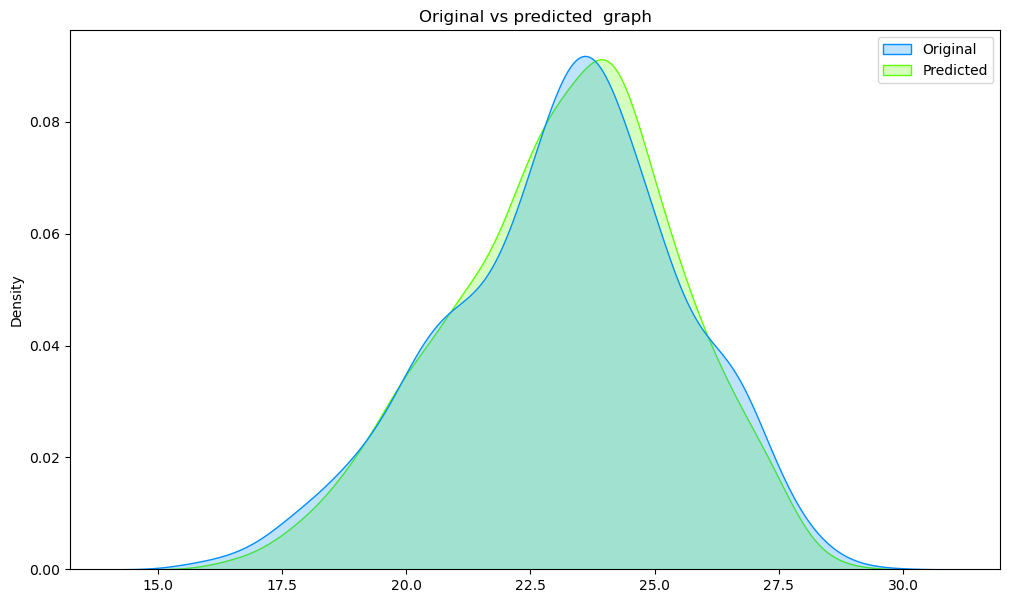

In [191]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new2, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## As we observed best model predict almost same output 